## **Step 1: Exploratory Data Analysis (EDA)**  

### **What to Do**  
- Load the dataset and inspect its structure using `.head()`, `.info()`, `.describe()`.  
- Check for missing values and determine how to handle them (drop, impute, etc.).  
- Identify duplicates and remove them if necessary.  
- Analyze basic statistics of numerical features:  
  - Mean, median, standard deviation, min, max.  
  - Correlations between variables.  
- Check the distribution of key features using:  
  - Histograms  
  - Box plots   
  - others
- Analyze relationships between features using:  
  - Correlation heatmaps  
  - Scatter plots for key relationships  
  - If applicable, analyze categorical features (e.g., genre) using bar charts.
  - others
- Check for potential outliers and determine how to handle them.  

**``Task 1. Provide a summary of findings from EDA (bullet points or short analysis).``**

**``Task 2. Provide at least three visualizations showing trends or insights from the dataset.``**  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, roc_auc_score, roc_curve, 
                             mean_absolute_error, mean_squared_error, r2_score)

from sklearn.exceptions import NotFittedError
from sklearn.metrics import roc_curve, auc, classification_report, ConfusionMatrixDisplay

import joblib
import warnings
import graphviz
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')


In [2]:
df = pd.read_csv("/Users/chaotzuchieh/Documents/GitHub/project-1-TzuChieh_Chao/Spotify_Song_Attributes.csv")
df.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


In [3]:
df.isnull().sum()

trackName              0
artistName             0
msPlayed               0
genre               1500
danceability         550
energy               550
key                  550
loudness             550
mode                 550
speechiness          550
acousticness         550
instrumentalness     550
liveness             550
valence              550
tempo                550
type                 550
id                   550
uri                  550
track_href           550
analysis_url         550
duration_ms          550
time_signature       550
dtype: int64

In [4]:
df.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


In [5]:
df.describe()

,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.008000e+04,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9.530000e+03,9530.000000
mean,1.519657e+06,0.602469,0.563524,5.241973,-8.685077,0.612382,0.078468,0.362924,0.153215,0.174589,0.434113,119.374474,2.029311e+05,3.917524
std,5.317343e+06,0.157745,0.243548,3.570615,5.414814,0.487232,0.080101,0.334337,0.313132,0.130749,0.242761,28.993087,9.587253e+04,0.386189
min,0.000000e+00,0.000000,0.001080,0.000000,-42.044000,0.000000,0.000000,0.000002,0.000000,0.024900,0.000000,0.000000,1.002700e+04,0.000000
25%,1.367800e+05,0.509000,0.403000,2.000000,-10.189000,0.000000,0.036100,0.053800,0.000000,0.096200,0.237000,97.568000,1.616970e+05,4.000000
50%,2.662875e+05,0.623000,0.589000,5.000000,-7.218000,1.000000,0.047900,0.245000,0.000025,0.119000,0.409000,119.822000,1.942860e+05,4.000000
75%,1.186307e+06,0.714000,0.751000,8.000000,-5.336000,1.000000,0.081900,0.668000,0.027600,0.209000,0.614000,139.785000,2.295260e+05,4.000000
max,1.583671e+08,0.976000,0.999000,11.000000,3.010000,1.000000,0.966000,0.996000,0.993000,0.964000,0.986000,236.196000,4.581483e+06,5.000000


In [6]:
df = df[df["genre"].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8580 entries, 1 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         8580 non-null   object 
 1   artistName        8580 non-null   object 
 2   msPlayed          8580 non-null   int64  
 3   genre             8580 non-null   object 
 4   danceability      8580 non-null   float64
 5   energy            8580 non-null   float64
 6   key               8580 non-null   float64
 7   loudness          8580 non-null   float64
 8   mode              8580 non-null   float64
 9   speechiness       8580 non-null   float64
 10  acousticness      8580 non-null   float64
 11  instrumentalness  8580 non-null   float64
 12  liveness          8580 non-null   float64
 13  valence           8580 non-null   float64
 14  tempo             8580 non-null   float64
 15  type              8580 non-null   object 
 16  id                8580 non-null   object 
 17 

In [7]:
df = df.drop_duplicates(subset='id', keep='first')
    
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4261 entries, 1 to 5039
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         4261 non-null   object 
 1   artistName        4261 non-null   object 
 2   msPlayed          4261 non-null   int64  
 3   genre             4261 non-null   object 
 4   danceability      4261 non-null   float64
 5   energy            4261 non-null   float64
 6   key               4261 non-null   float64
 7   loudness          4261 non-null   float64
 8   mode              4261 non-null   float64
 9   speechiness       4261 non-null   float64
 10  acousticness      4261 non-null   float64
 11  instrumentalness  4261 non-null   float64
 12  liveness          4261 non-null   float64
 13  valence           4261 non-null   float64
 14  tempo             4261 non-null   float64
 15  type              4261 non-null   object 
 16  id                4261 non-null   object 
 17  

In [8]:
df.duplicated(subset=['id']).sum()

np.int64(0)

In [9]:
df.isnull().sum()

trackName           0
artistName          0
msPlayed            0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [10]:
df['genre'].nunique()

523

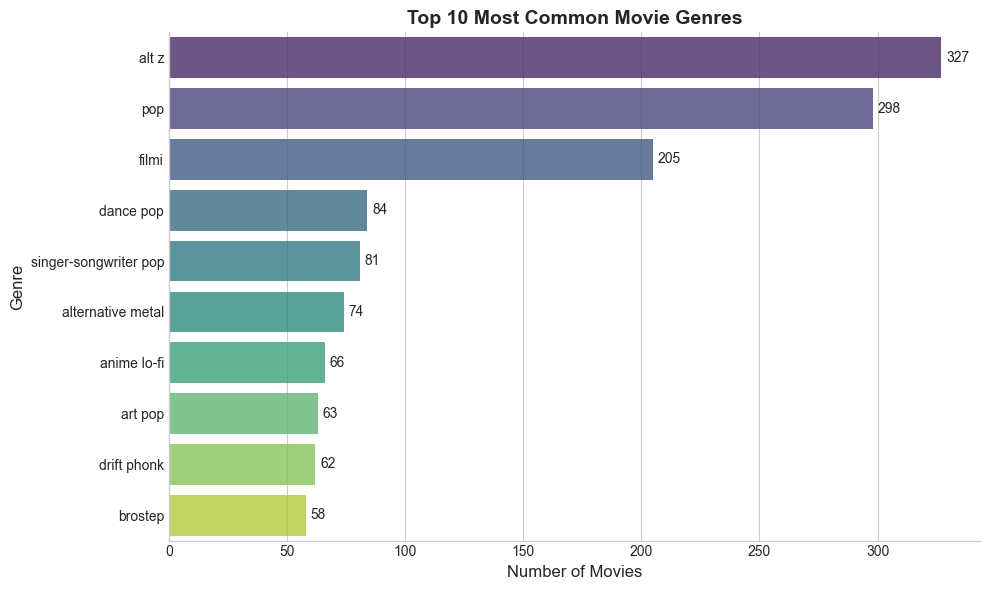

In [11]:
plt.figure(figsize=(10, 6))  


top_genres = df['genre'].value_counts().nlargest(10)


ax = sns.barplot(
    x=top_genres.values,  
    y=top_genres.index,   
    palette="viridis",    
    alpha=0.8            
)

for i, v in enumerate(top_genres.values):
    ax.text(v + 2 , i, f"{v:,}", va='center')

plt.title('Top 10 Most Common Movie Genres', fontsize=14, fontweight='bold')
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)


sns.despine()

plt.tight_layout()

plt.show()

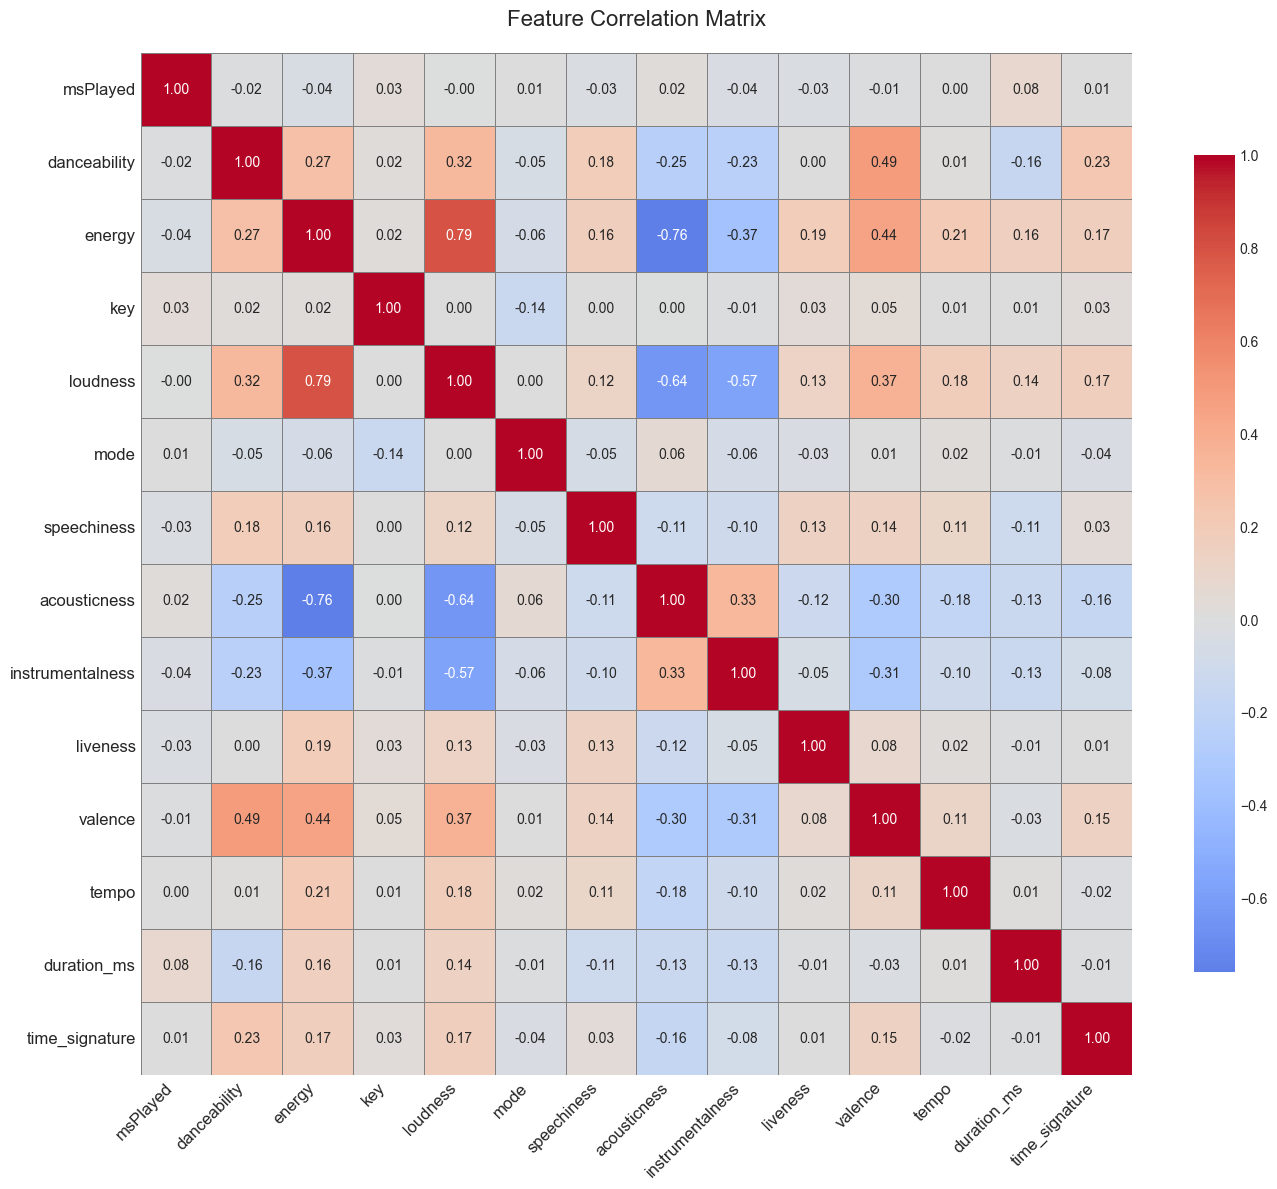

In [12]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14, 12))  
ax = sns.heatmap(
    correlation_matrix,
    annot=True,
    annot_kws={"size": 10}, 
    fmt=".2f",              
    cmap="coolwarm",
    center=0,
    linewidths=0.5,         
    linecolor="grey",       
    cbar_kws={"shrink": 0.8}
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment="right",
    fontsize=12
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,           
    fontsize=12
)

plt.title("Feature Correlation Matrix", fontsize=16, pad=20)
plt.tight_layout()          
plt.show()

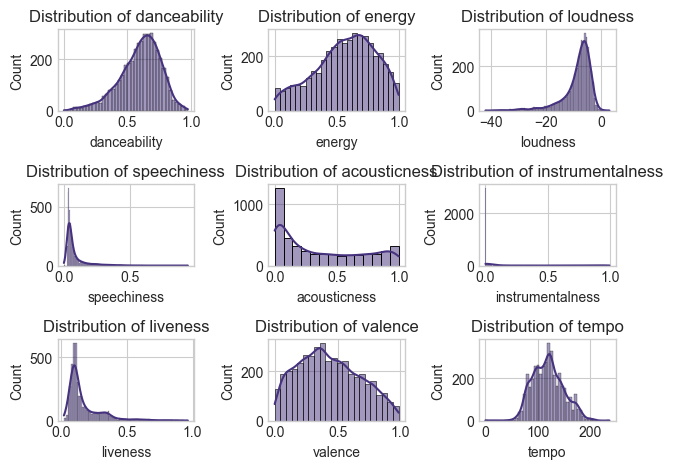

In [13]:
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

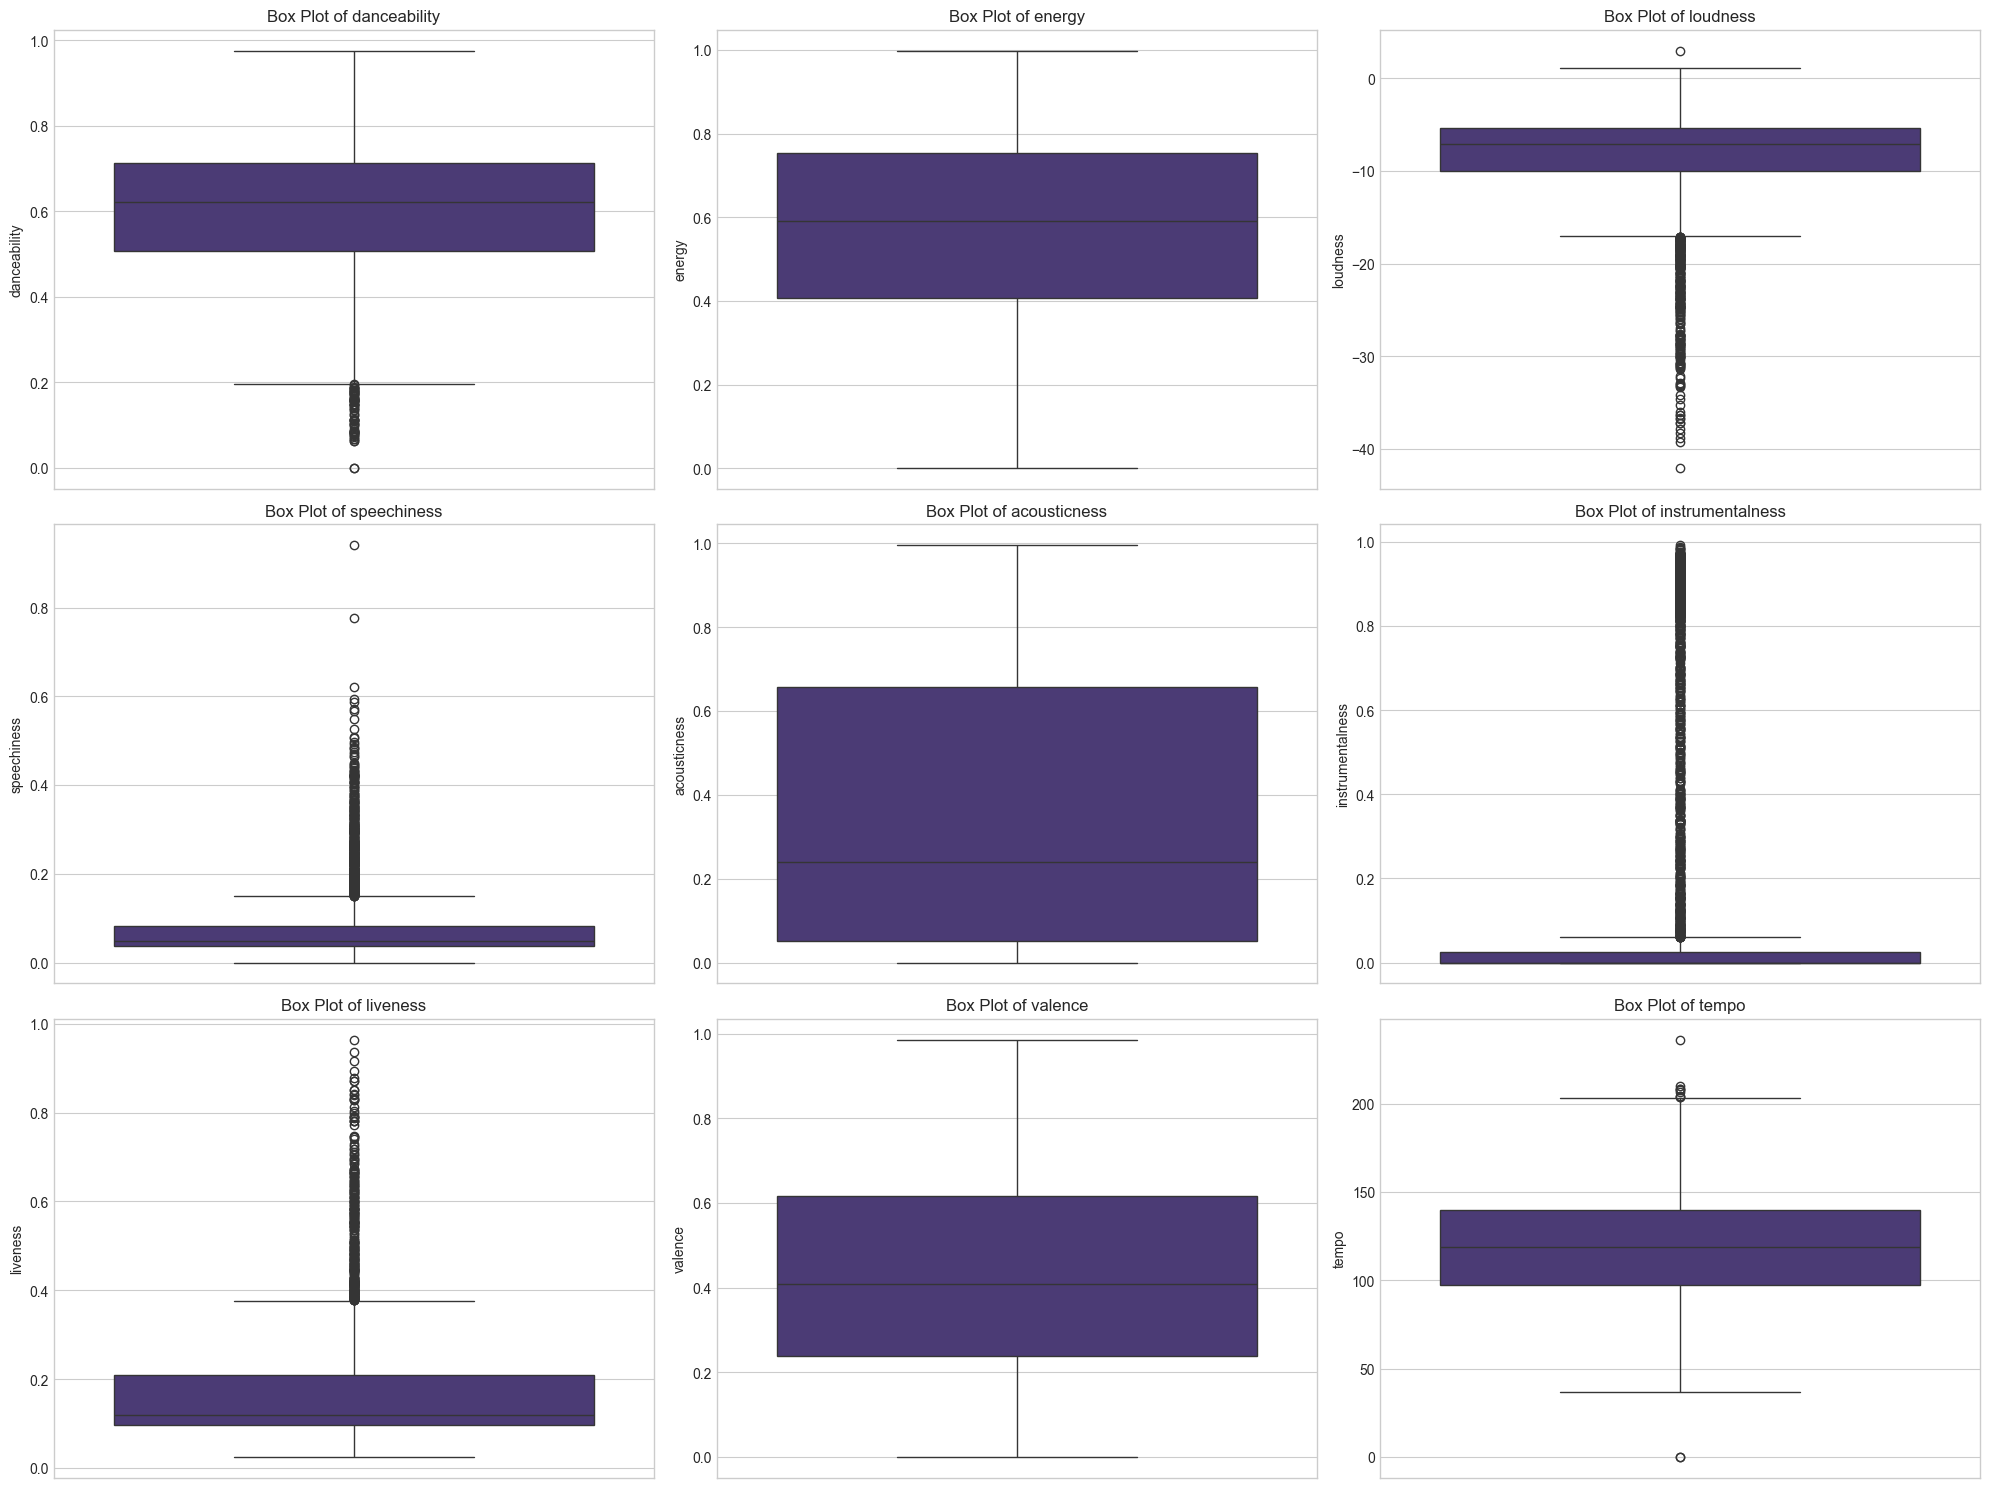

In [14]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()


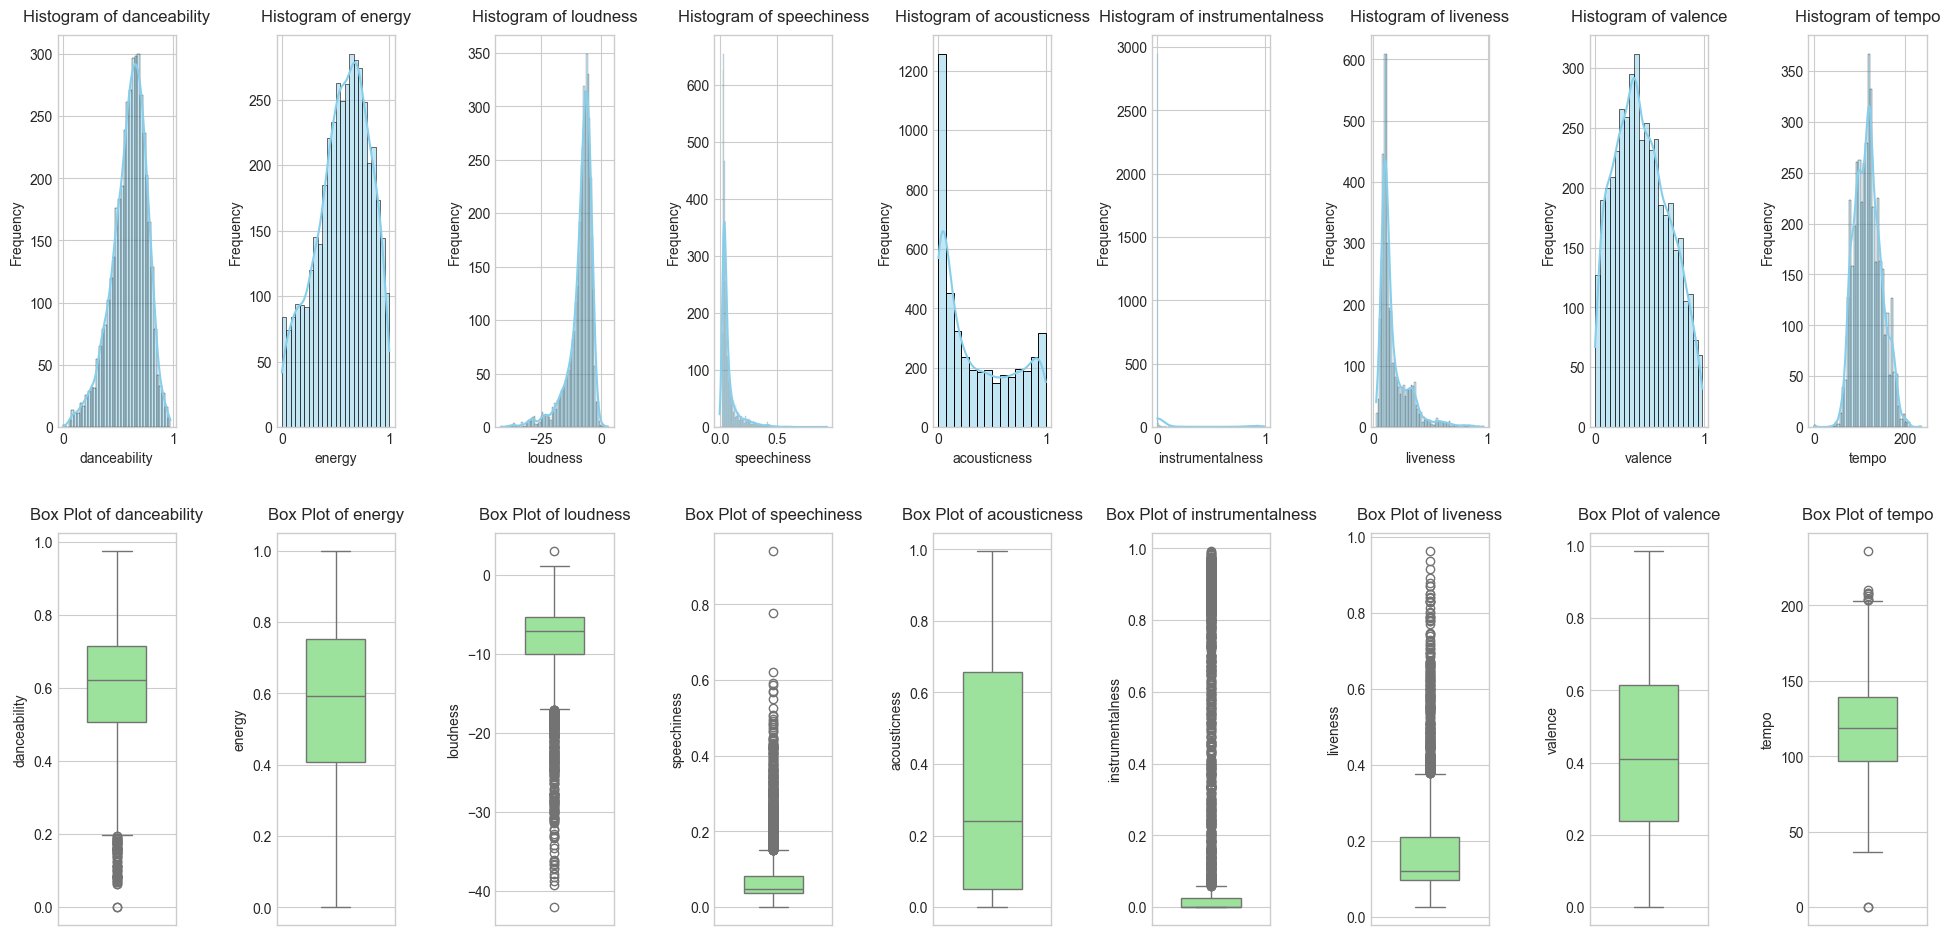

In [15]:

plt.figure(figsize=(20, 10))  


for i, feature in enumerate(numerical_features):

    plt.subplot(2, len(numerical_features), i + 1)
    sns.histplot(df[feature], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}', fontsize=12, pad=10)  
    plt.xlabel(feature, fontsize=10) 
    plt.ylabel('Frequency', fontsize=10)  

    
    plt.subplot(2, len(numerical_features), i + len(numerical_features) + 1)
    sns.boxplot(y=df[feature], color='lightgreen', width=0.5)
    plt.title(f'Box Plot of {feature}', fontsize=12, pad=10)  
    plt.ylabel(feature, fontsize=10)  


plt.tight_layout(pad=3.0)  
plt.show()

## **Step 2: Data Preprocessing & Cleaning Pipelines**  

**``Task 3. Provide a written summary of the preprocessing steps.``**  

**Initially, I eliminate the rows that have missing values in the "genre" column.   
Then, I proceed to remove duplicates based on the "id" column.**

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin



class DataCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, nan_column=None, duplicate_column=None):
      
        self.nan_column = nan_column
        self.duplicate_column = duplicate_column

    def fit(self, X, y=None):
      
        return self

    def transform(self, X):
       
        if self.nan_column:
            X = X[X[self.nan_column].notna()]  
        if self.duplicate_column:
            X = X.drop_duplicates(subset=self.duplicate_column, keep="first")  
        return X


Cleaning_pipeline = Pipeline(steps=[
    ("cleaner", DataCleaner(nan_column="genre", duplicate_column="id")),  
])

In [17]:
joblib.dump(Cleaning_pipeline, 'cleaning_pipeline.pkl')

['cleaning_pipeline.pkl']

In [18]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

## **Step 3: Select a Classification and Regression Task**  

 
- Pick **one classification problem** (e.g., predict high/low `danceability`, predict a song’s `energy` category, etc.).  
- Pick **one regression problem** (e.g., predict a song’s `tempo` based on features, predict `loudness` based on other audio properties, etc.).  

**``Task 4. Clearly state the target variable for both classification and regression AND Explain why this task is interesting.``**  

# Classification problem  
## Topic: Predicting Track Danceability

**Target Variable**: Danceability - Categorized into Low and High levels (threshold = 0.7)

**Selected Features**:
Based on correlation analysis, we've selected the following 6 most predictive audio characteristics:
- Valence - The musical positiveness or happiness conveyed by the track.
- Energy - The energy level of the track. 
- Loudness - The overall loudness of the track in decibels (dB).
- Acousticness - The acousticness of the track. 
- Instrumentalness - The probability of the track being instrumental.  
- Speechiness - The presence of spoken words in the track.


**Description**:
This project utilizes a carefully curated set of 7 key audio features to build a binary classification model that categorizes music tracks as either high or low danceability. By analyzing the complex interactions between valence, energy, loudness, and other features, we can accurately predict a song's dance potential without relying on subjective evaluations or genre labels.

**Applications**:
1. **Personalized Music Discovery**: Help users find new tracks matching their dance energy preferences across traditional genre boundaries
2. **Intelligent Playlist Curation**: Automatically generate tailored playlists for different settings (gyms, parties, casual dancing)
3. **DJ and Performance Support**: Assist DJs and music performers in selecting tracks that maximize audience physical engagement
4. **Enhanced Music Recommendation**: Provide streaming platforms with more precise danceability metrics to improve recommendation algorithms

**Innovation**:
Through multimodal analysis, we reveal how valence, energy, and sonic characteristics combine to create the perception of danceability, offering new insights into the relationship between music's physical properties and human movement response.

This model, with its precisely filtered feature set, aims to capture the kinetic potential of music, bringing more accurate and personalized experiences to music discovery and curation.

# Regression problem  

## Topic: Predicting Song Valence

**Target Variable**: Valence - Quantifying the degree of positive emotion conveyed by a track

**Selected Features**:
Based on correlation analysis, we've selected the following five most predictive musical attributes:
- Danceability - Reflects a track's rhythmic stability and suitability for dancing
- Energy - The energy level of the track. 
- Loudness - The overall loudness of the track in decibels (dB).
- Instrumentalness - The probability of the track being instrumental.  
- Acousticness - The acousticness of the track. 

**Project Description**:
This study leverages five carefully selected audio features to develop a regression model that predicts a song's emotional valence. By analyzing the complex interplay between danceability, energy levels, and sonic characteristics, we can estimate the positivity of a track's emotional content, providing valuable insights into the relationship between musical structure and emotional perception.

**Applications**:
1. **Trend Analysis**: Enabling music platforms and record labels to track emotional trends in popular music, informing content strategy and production decisions
2. **Personalized Recommendation Systems**: Enhancing music recommendation algorithms to match listeners' emotional needs, providing uplifting tracks during low periods or calming music in stressful situations
3. **Music Production Guidance**: Offering music producers data-driven insights into how specific audio characteristics influence emotional perception, supporting intentional emotional composition

This regression model, though operating in the subjective domain of emotional response, provides a quantitative framework for understanding how fundamental musical elements combine to create emotional experiences in listeners.

## **Step 4: Training Machine Learning Models**  

### **Classification Task**  
- Train and compare:  
    - Logistic Regression  
    - Random Forest Classifier  

- Tune hyperparameters using `GridSearchCV` or `RandomizedSearchCV`.  

- Measure performance using:  
    - Accuracy  
    - Precision, Recall, F1-score  
    - Confusion matrix  
    - ROC-AUC curve  

- Save trained models using joblib
- Save the preprocessing pipeline (scalers, encoders, etc.)




In [19]:
df_cls = df[[ "energy", "danceability", "acousticness", "instrumentalness",
             "loudness", "speechiness", "valence"]]

threshold = 0.7  
df_cls["danceability"] = (df_cls["danceability"] >= threshold).astype(int)



In [20]:
df_cls

,energy,danceability,acousticness,instrumentalness,loudness,speechiness,valence
1,0.130,0,0.9160,0.956000,-17.719,0.0510,0.122
2,0.814,0,0.0164,0.000000,-3.788,0.1170,0.509
3,0.596,0,0.4750,0.203000,-9.804,0.0314,0.896
4,0.726,0,0.0158,0.000169,-11.402,0.0444,0.507
5,0.611,0,0.2900,0.000021,-5.925,0.1370,0.645
...,...,...,...,...,...,...,...
5034,0.477,1,0.2020,0.000000,-7.706,0.0880,0.454
5035,0.143,0,0.9610,0.005720,-16.992,0.0331,0.245
5037,0.158,0,0.4380,0.134000,-7.783,0.0311,0.248
5038,0.284,0,0.9320,0.000476,-14.025,0.0801,0.208


In [21]:
df_cls_train, df_cls_test = train_test_split(df_cls, test_size=0.2, random_state=42, shuffle=True)

In [22]:
df_cls_x_train = df_cls_train.drop("danceability", axis=1)
df_cls_y_train = df_cls_train["danceability"].copy()
df_cls_x_test = df_cls_test.drop("danceability", axis=1)
df_cls_y_test = df_cls_test["danceability"].copy()

In [23]:
df_cls_x_test.to_csv('df_cls_x_test.csv', index=False)
df_cls_y_test.to_csv('df_cls_y_test.csv', index=False)


In [24]:
cls_numeric_features = ['energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'valence']



cls_numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cls_preprocessor = ColumnTransformer(
    transformers=[
        ('num', cls_numeric_transformer, cls_numeric_features)
    ])

cls_preprocessor.fit(df_cls_x_train)
joblib.dump(cls_preprocessor, 'cls_preprocessor.pkl')

['cls_preprocessor.pkl']

## LogisticRegression

Accuracy: 0.7456
Precision: 0.5447
Recall: 0.2939
F1-score: 0.3818

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       625
           1       0.54      0.29      0.38       228

    accuracy                           0.75       853
   macro avg       0.66      0.60      0.61       853
weighted avg       0.72      0.75      0.72       853


Confusion Matrix:
[[569  56]
 [161  67]]


<Figure size 800x600 with 0 Axes>

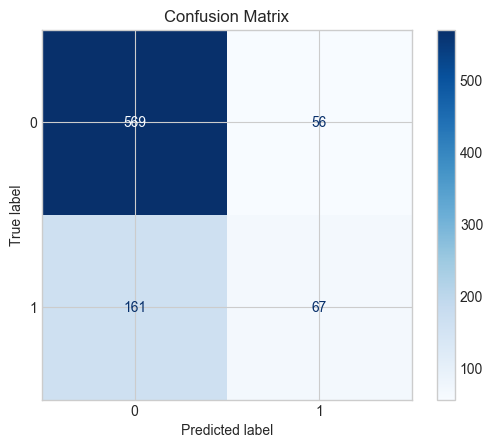

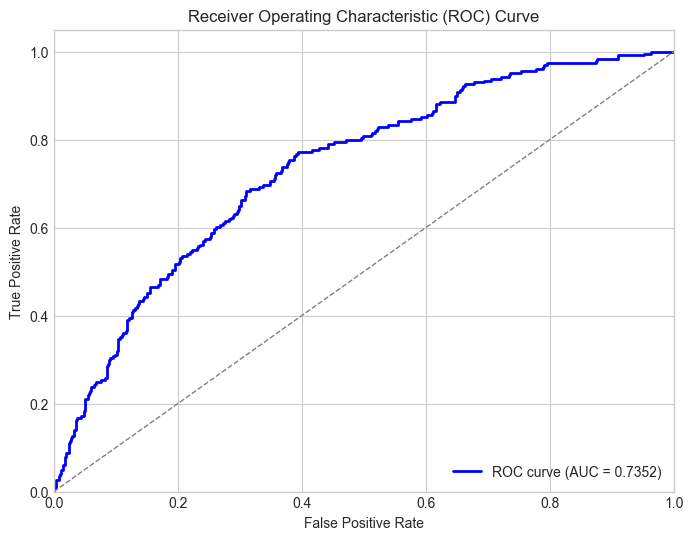


Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1'}


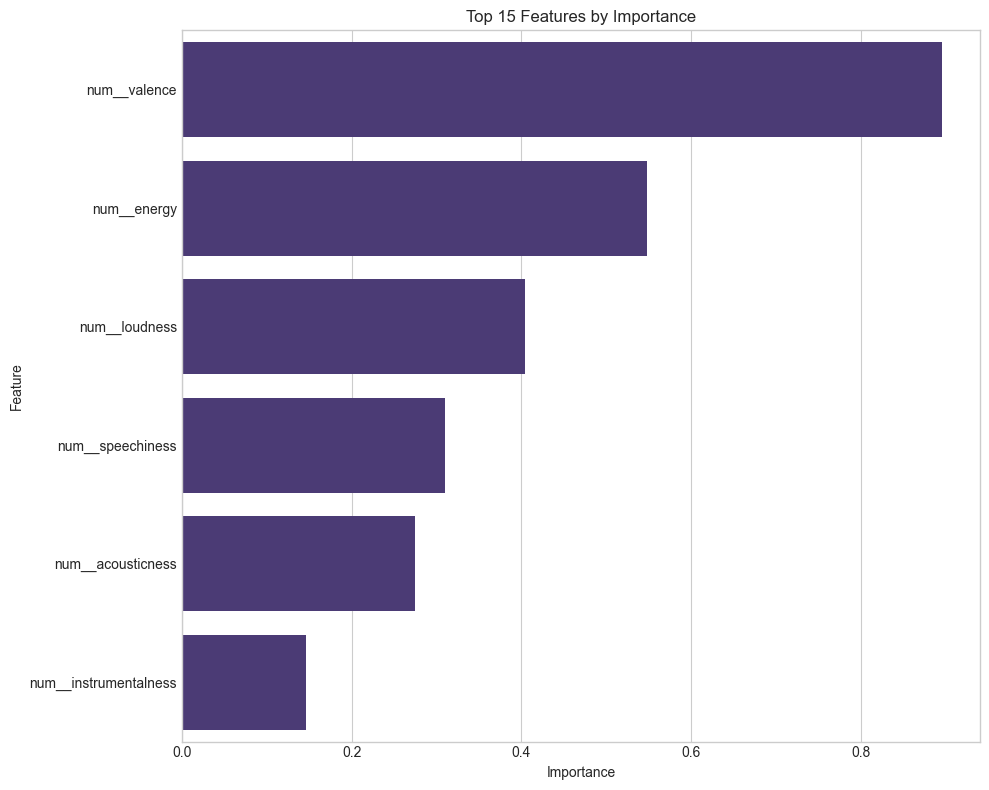


Top 10 features with coefficients:
              Feature  Coefficient
         num__valence     0.896000
          num__energy    -0.548682
        num__loudness     0.404317
     num__speechiness     0.309810
    num__acousticness    -0.274858
num__instrumentalness     0.146043


In [25]:
# Create logistic regression pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', cls_preprocessor),  # Use preprocessor for classification tasks
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'))  # Add solver parameter
])
logreg_pipeline.fit(df_cls_x_train, df_cls_y_train)

# Define hyperparameter grid
param_grid_logreg = {
    'classifier__C': [0.1, 1, 10],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2']  # Regularization technique
}

# Use GridSearchCV for hyperparameter tuning
grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(df_cls_x_train, df_cls_y_train)

# Get the best model
best_logreg_model = grid_search_logreg.best_estimator_

# Predictions
y_pred = best_logreg_model.predict(df_cls_x_test)
y_pred_proba = best_logreg_model.predict_proba(df_cls_x_test)[:, 1]


# Accuracy
accuracy = accuracy_score(df_cls_y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1-score
precision = precision_score(df_cls_y_test, y_pred)
recall = recall_score(df_cls_y_test, y_pred)
f1 = f1_score(df_cls_y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Classification report (includes precision, recall, f1 for each class)
print("\nClassification Report:")
print(classification_report(df_cls_y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(df_cls_y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(df_cls_y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Show best parameters
print(f"\nBest parameters: {grid_search_logreg.best_params_}")

# Save model
joblib.dump(best_logreg_model, 'best_logreg_model_danceability.pkl')

# Feature Importance (for logistic regression)
try:
    # Get feature names
    feature_names = best_logreg_model.named_steps['preprocessor'].get_feature_names_out()
    
    # Get coefficients
    coefficients = best_logreg_model.named_steps['classifier'].coef_[0]
    
    # Create DataFrame for feature importance
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coefficients)})
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    # Plot top 15 features
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Features by Importance')
    plt.tight_layout()
    plt.show()
    
    # Print top 10 features with their coefficients
    print("\nTop 10 features with coefficients:")
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)
    print(coef_df.head(10).to_string(index=False))
    
except Exception as e:
    print(f"Could not extract feature importance: {e}")

## RandomForestClassifier

Best Random Forest model accuracy: 0.7550
Precision: 0.5714
Recall: 0.3333
F1-score: 0.4211
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       625
           1       0.57      0.33      0.42       228

    accuracy                           0.75       853
   macro avg       0.68      0.62      0.63       853
weighted avg       0.73      0.75      0.73       853


Confusion Matrix:
[[568  57]
 [152  76]]


<Figure size 800x600 with 0 Axes>

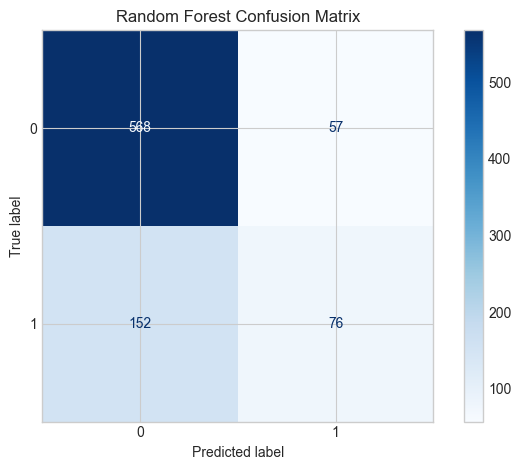

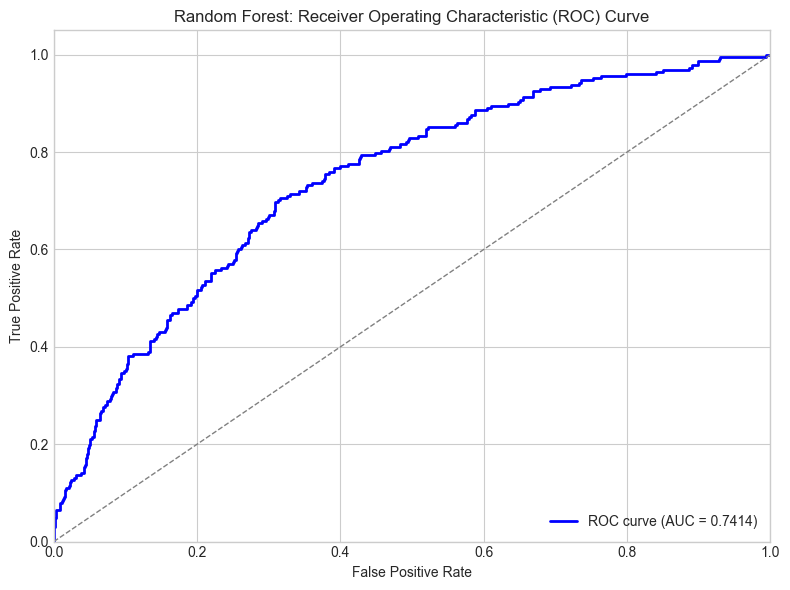

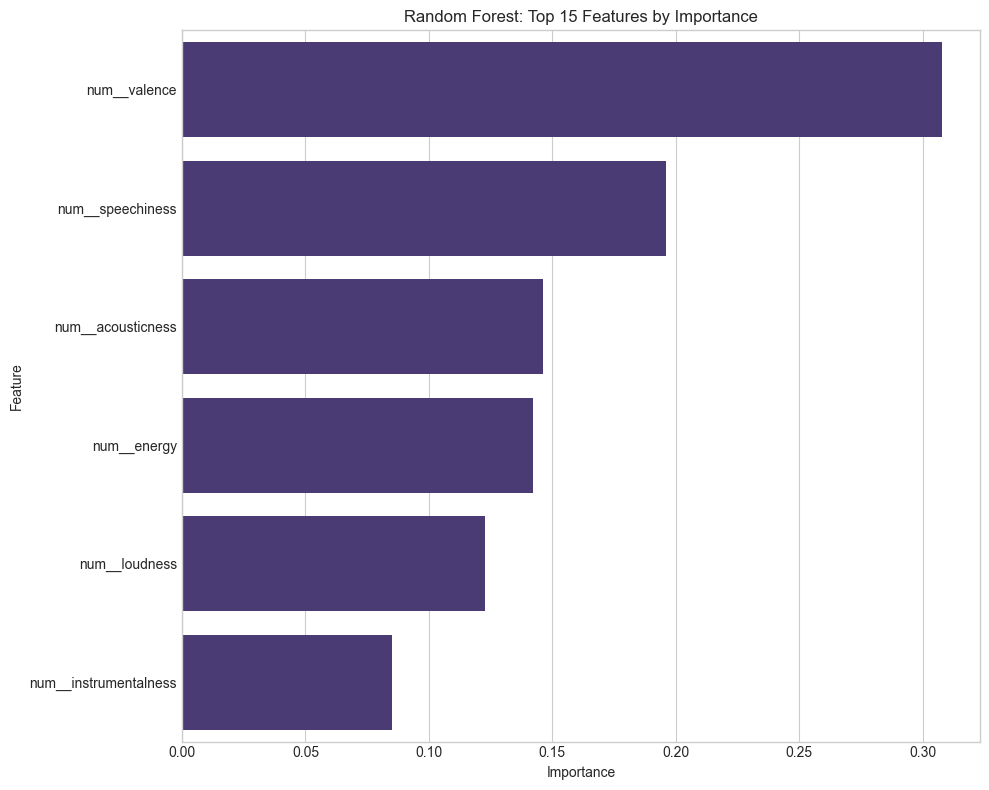


Top 10 features by importance:
              Feature  Importance
         num__valence    0.307812
     num__speechiness    0.196059
    num__acousticness    0.146383
          num__energy    0.141991
        num__loudness    0.122782
num__instrumentalness    0.084974


['best_rf_model_danceability.pkl']

In [26]:


# Create Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', cls_preprocessor),  # Use the preprocessor
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(df_cls_x_train, df_cls_y_train)

# Define hyperparameter grid
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(df_cls_x_train, df_cls_y_train)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(df_cls_x_test)
y_pred_proba = best_rf_model.predict_proba(df_cls_x_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(df_cls_y_test, y_pred)
precision = precision_score(df_cls_y_test, y_pred)
recall = recall_score(df_cls_y_test, y_pred)
f1 = f1_score(df_cls_y_test, y_pred)

# Display basic metrics
print(f"Best Random Forest model accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Best parameters: {grid_search_rf.best_params_}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(df_cls_y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(df_cls_y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

# Create ROC curve
fpr, tpr, thresholds = roc_curve(df_cls_y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Feature importance visualization
try:
    # Get feature names from the preprocessor
    feature_names = best_rf_model.named_steps['preprocessor'].get_feature_names_out()
    
    # Get feature importance
    importances = best_rf_model.named_steps['classifier'].feature_importances_
    
    # Create DataFrame for feature importance
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    # Plot top 15 features
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Random Forest: Top 15 Features by Importance')
    plt.tight_layout()
    plt.show()
    
    # Print top 10 important features
    print("\nTop 10 features by importance:")
    print(feature_importance.head(10).to_string(index=False))
    
except Exception as e:
    print(f"Could not extract feature importance: {e}")

# Save the model
joblib.dump(best_rf_model, 'best_rf_model_danceability.pkl')

**Following the data preprocessing phase, I developed and evaluated two machine learning classification models aimed at predicting danceability levels (high/low) to determine which model exhibited superior performance. The results indicated that the Random Forest classifier outperformed the Logistic Regression model. While Logistic Regression operates under the assumption of a linear relationship among variables, the Random Forest model demonstrates a greater capacity for managing nonlinear relationships and effectively capturing interactions between features.**

-------------------------------------


### **Regression Task**  
- Train and compare:  
    - Linear Regression (with and without regularization, e.g., Ridge/Lasso)  
    - Decision Tree Regressor  

- Tune hyperparameters to optimize model performance using `GridSearchCV` or `RandomizedSearchCV`.    

- Compare models using:  
    - R² (Coefficient of Determination)  
    - Mean Absolute Error (MAE)  
    - Mean Squared Error (MSE)  
    - Root Mean Squared Error (RMSE)

- Save trained models using joblib
- Save the preprocessing pipeline (scalers, encoders, etc.)


**``Task 5. After completing all steps above, provide the following:``** 
- Training performance metrics for each model.  
- A short explanation of which model performed better and why.
- Are there any differences when adding regularization into regression? Which features are more important? 

---

In [27]:
df_reg = df[[ "energy", "danceability", "acousticness", "instrumentalness",
             "loudness", "valence"]]


In [28]:
df_reg

,energy,danceability,acousticness,instrumentalness,loudness,valence
1,0.130,0.475,0.9160,0.956000,-17.719,0.122
2,0.814,0.691,0.0164,0.000000,-3.788,0.509
3,0.596,0.624,0.4750,0.203000,-9.804,0.896
4,0.726,0.625,0.0158,0.000169,-11.402,0.507
5,0.611,0.645,0.2900,0.000021,-5.925,0.645
...,...,...,...,...,...,...
5034,0.477,0.745,0.2020,0.000000,-7.706,0.454
5035,0.143,0.537,0.9610,0.005720,-16.992,0.245
5037,0.158,0.282,0.4380,0.134000,-7.783,0.248
5038,0.284,0.632,0.9320,0.000476,-14.025,0.208


In [29]:
df_reg_train, df_reg_test = train_test_split(df_reg, test_size=0.2, random_state=42, shuffle=True)

df_reg_train.shape , df_reg_test.shape

((3408, 6), (853, 6))

In [30]:
df_reg_x_train = df_reg_train.drop("valence", axis=1)
df_reg_y_train = df_reg_train["valence"].copy()
df_reg_x_test = df_reg_test.drop("valence", axis=1)
df_reg_y_test = df_reg_test["valence"].copy()

In [31]:
df_reg_x_test.to_csv('df_reg_x_test.csv', index=False)
df_reg_y_test.to_csv('df_reg_y_test.csv', index=False)  

In [32]:
reg_numeric_features = [ 'energy', 'danceability', 'acousticness', 
                     'loudness', 'instrumentalness']


reg_numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])



reg_preprocessor = ColumnTransformer(
    transformers=[
        ('num', reg_numeric_transformer, reg_numeric_features)
    ])


joblib.dump(reg_preprocessor, 'reg_preprocessor.pkl')

['reg_preprocessor.pkl']

## LinearRegression

In [33]:
lin_reg_pipeline = Pipeline([
    ('preprocessor', reg_preprocessor),
    ('poly', PolynomialFeatures(include_bias=False)), 
    ('lin_reg', LinearRegression())
])


lin_reg_pipeline.fit(df_reg_x_train, df_reg_y_train)
print(lin_reg_pipeline.get_params())




{'memory': None, 'steps': [('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['energy', 'danceability', 'acousticness',
                                  'loudness', 'instrumentalness'])])), ('poly', PolynomialFeatures(include_bias=False)), ('lin_reg', LinearRegression())], 'transform_input': None, 'verbose': False, 'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['energy', 'danceability', 'acousticness',
                                  'loudness', 'instrumentalness'])]), 'poly': PolynomialFeatures(include_bias=False), 'lin_reg': LinearRegression(), 'preprocessor__force_int_remainder_cols': True, 'preprocessor__n_jobs': None, 'preprocessor__remainder': 'drop', 'preprocessor__sparse_threshold': 0.3, 'preprocessor__transformer_weights': None, 'pre

In [34]:
param_grid = {
    'lin_reg__fit_intercept': [True, False],
    'lin_reg__copy_X': [True, False],
    'lin_reg__positive': [True, False]  
}

grid_search_lin = GridSearchCV(
    lin_reg_pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

Best Linear Regression parameters: {'lin_reg__copy_X': True, 'lin_reg__fit_intercept': True, 'lin_reg__positive': False}
Best cross-validation score: 0.0366 (MSE)

Linear Regression with Polynomial Features evaluation results:
R² score: 0.3602
MAE: 0.1523
MSE: 0.0363
RMSE: 0.1904


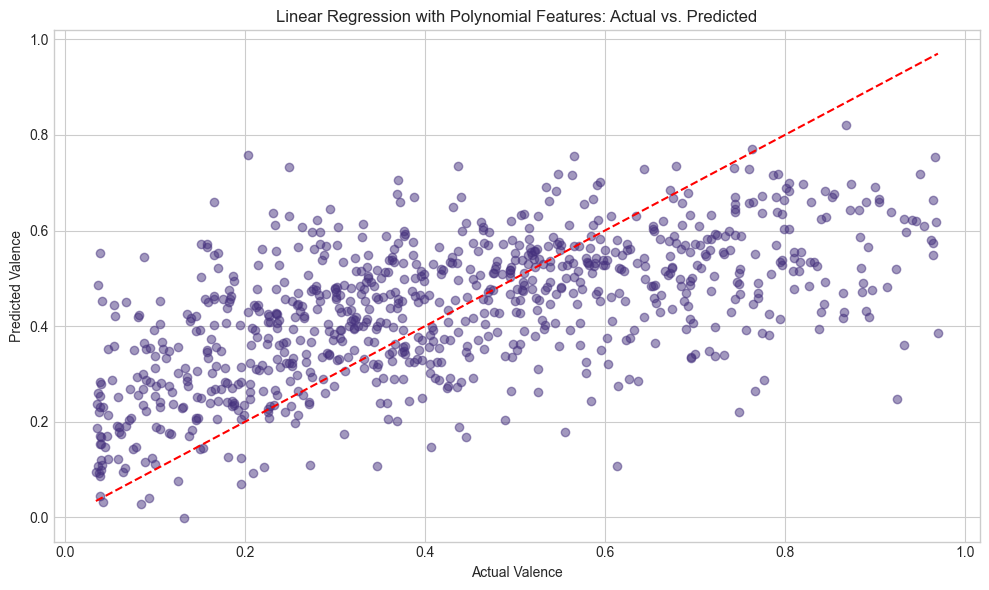

In [35]:
grid_search_lin.fit(df_reg_x_train, df_reg_y_train)
best_lin_reg = grid_search_lin.best_estimator_

print(f"Best Linear Regression parameters: {grid_search_lin.best_params_}")
print(f"Best cross-validation score: {-grid_search_lin.best_score_:.4f} (MSE)")


y_pred_lin = best_lin_reg.predict(df_reg_x_test)


r2_lin = r2_score(df_reg_y_test, y_pred_lin)
mae_lin = mean_absolute_error(df_reg_y_test, y_pred_lin)
mse_lin = mean_squared_error(df_reg_y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)


print("\nLinear Regression with Polynomial Features evaluation results:")
print(f"R² score: {r2_lin:.4f}")
print(f"MAE: {mae_lin:.4f}")
print(f"MSE: {mse_lin:.4f}")
print(f"RMSE: {rmse_lin:.4f}")


joblib.dump(best_lin_reg, 'linear_regression_model.pkl')

plt.figure(figsize=(10, 6))
plt.scatter(df_reg_y_test, y_pred_lin, alpha=0.5)
plt.plot([df_reg_y_test.min(), df_reg_y_test.max()], [df_reg_y_test.min(), df_reg_y_test.max()], 'r--')
plt.xlabel('Actual Valence')
plt.ylabel('Predicted Valence')
plt.title('Linear Regression with Polynomial Features: Actual vs. Predicted')
plt.tight_layout()
plt.show()

## LinearRegression(Ridge)

In [36]:
ridge_pipeline = Pipeline([
    ('preprocessor', reg_preprocessor),
    ('regressor', Ridge(random_state=42, max_iter=10000))
])
# Define hyperparameter grid
param_grid_ridge = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
    'regressor__fit_intercept': [True]
}
# Use GridSearchCV for hyperparameter tuning
grid_search_ridge = GridSearchCV(
    ridge_pipeline, 
    param_grid_ridge, 
    cv=5, 
    scoring='r2',
    verbose=1
)
grid_search_ridge.fit(df_reg_x_train, df_reg_y_train)
best_ridge = grid_search_ridge.best_estimator_
print(f"Best Ridge parameters: {grid_search_ridge.best_params_}")
print(f"Best cross-validation score: {grid_search_ridge.best_score_:.4f} (R²)")
# Make predictions on test set
y_pred_ridge = best_ridge.predict(df_reg_x_test)
# Calculate evaluation metrics
r2_ridge = r2_score(df_reg_y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(df_reg_y_test, y_pred_ridge)
mse_ridge = mean_squared_error(df_reg_y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
# Display results
print("\nRidge evaluation results:")
print(f"R² score: {r2_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
# Save model
joblib.dump(best_ridge, 'ridge_model.pkl')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Ridge parameters: {'regressor__alpha': 1.0, 'regressor__fit_intercept': True}
Best cross-validation score: 0.3722 (R²)

Ridge evaluation results:
R² score: 0.3567
MAE: 0.1542
MSE: 0.0365
RMSE: 0.1909


['ridge_model.pkl']

## LinearRegression(Lasso)

In [37]:
lasso_pipeline = Pipeline([
    ('preprocessor', reg_preprocessor),
    ('regressor', Lasso(random_state=42, max_iter=10000))
])
# Define hyperparameter grid
param_grid_lasso = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
    'regressor__fit_intercept': [True]
}
# Use GridSearchCV for hyperparameter tuning
grid_search_lasso = GridSearchCV(
    lasso_pipeline, 
    param_grid_lasso, 
    cv=5, 
    scoring='r2',
    verbose=1
)
grid_search_lasso.fit(df_reg_x_train, df_reg_y_train)
best_lasso = grid_search_lasso.best_estimator_
print(f"Best Lasso parameters: {grid_search_lasso.best_params_}")
print(f"Best cross-validation score: {grid_search_lasso.best_score_:.4f} (R²)")
# Make predictions on test set
y_pred_lasso = best_lasso.predict(df_reg_x_test)
# Calculate evaluation metrics
r2_lasso = r2_score(df_reg_y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(df_reg_y_test, y_pred_lasso)
mse_lasso = mean_squared_error(df_reg_y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
# Display results
print("\nLasso evaluation results:")
print(f"R² score: {r2_lasso:.4f}")
print(f"MAE: {mae_lasso:.4f}")
print(f"MSE: {mse_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")
# Save model
joblib.dump(best_lasso, 'lasso_model.pkl')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Lasso parameters: {'regressor__alpha': 0.0001, 'regressor__fit_intercept': True}
Best cross-validation score: 0.3722 (R²)

Lasso evaluation results:
R² score: 0.3565
MAE: 0.1542
MSE: 0.0365
RMSE: 0.1910


['lasso_model.pkl']

## DecisionTreeRegressor(GridSearchCV)

Fitting 10 folds for each of 5120 candidates, totalling 51200 fits
Best Decision Tree parameters: {'regressor__ccp_alpha': 0.0, 'regressor__criterion': 'squared_error', 'regressor__max_depth': 6, 'regressor__max_features': 0.7, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 20, 'regressor__splitter': 'best'}
Best cross-validation score: 0.3201 (R²)

Decision Tree evaluation results:
R² score: 0.2950
MAE: 0.1604
MSE: 0.0400
RMSE: 0.1999


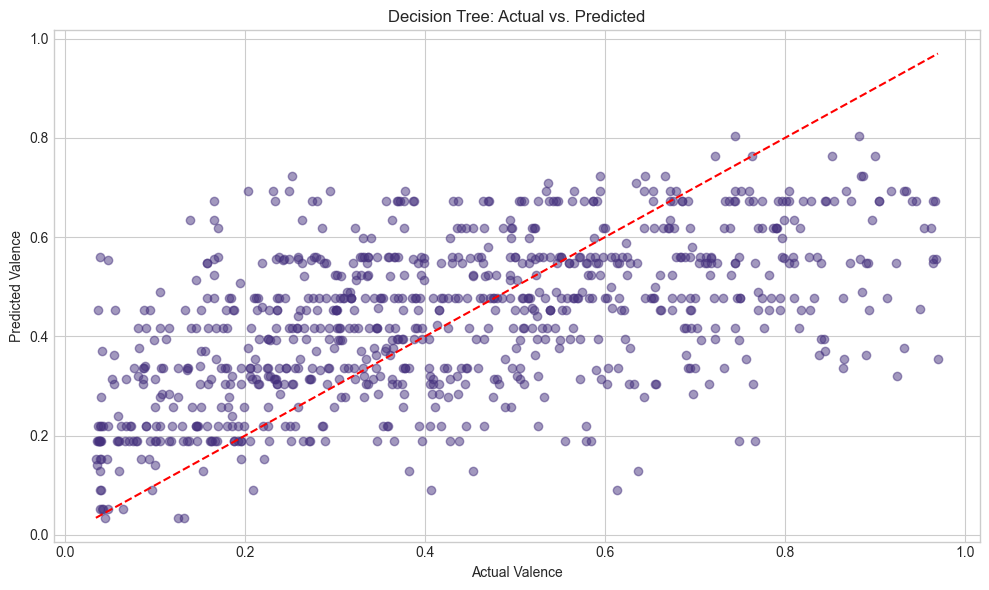

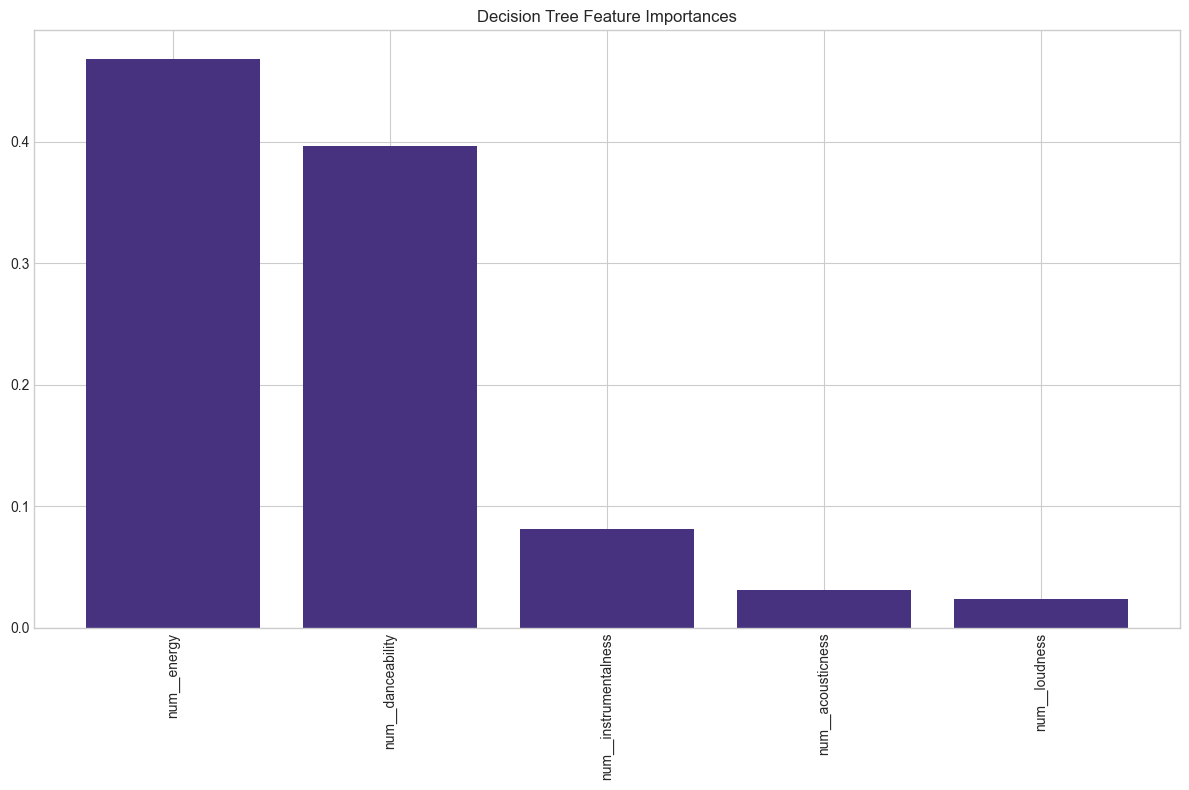

Could not plot decision tree: The 'proportion' parameter of plot_tree must be an instance of 'bool' or an instance of 'numpy.bool'. Got 1.5 instead.

Decision Tree Text Representation (Limited to Depth 3):
|--- num__energy <= -0.32
|   |--- num__danceability <= 0.53
|   |   |--- num__instrumentalness <= -0.48
|   |   |   |--- num__danceability <= 0.24
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- num__danceability >  0.24
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- num__instrumentalness >  -0.48
|   |   |   |--- num__danceability <= -1.92
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- num__danceability >  -1.92
|   |   |   |   |--- truncated branch of depth 3
|   |--- num__danceability >  0.53
|   |   |--- num__danceability <= 0.97
|   |   |   |--- num__energy <= -0.71
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- num__energy >  -0.71
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- num__danceabil

<Figure size 3000x1500 with 0 Axes>

In [38]:
decision_tree_pipeline = Pipeline([
    ('preprocessor', reg_preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
param_grid_dt = {
    'regressor__max_depth': [6, 8, 10, 12, 15],
    'regressor__min_samples_split': [2, 5, 10, 20],
    'regressor__min_samples_leaf': [1, 2, 4, 8],
    'regressor__max_features': ['sqrt', 'log2', 0.5, 0.7],
    'regressor__criterion': ['squared_error', 'friedman_mse'],
    'regressor__splitter': ['best', 'random'],
    'regressor__ccp_alpha': [0.0, 0.01, 0.03, 0.05]
}
grid_search_dt = GridSearchCV(
    decision_tree_pipeline, 
    param_grid_dt, 
    cv=10, 
    scoring='r2',
    verbose=1,
    n_jobs=-1
)
grid_search_dt.fit(df_reg_x_train, df_reg_y_train)
best_dt = grid_search_dt.best_estimator_
print(f"Best Decision Tree parameters: {grid_search_dt.best_params_}")
print(f"Best cross-validation score: {grid_search_dt.best_score_:.4f} (R²)")
# Make predictions on test set
y_pred_dt = best_dt.predict(df_reg_x_test)
# Calculate evaluation metrics
r2_dt = r2_score(df_reg_y_test, y_pred_dt)
mae_dt = mean_absolute_error(df_reg_y_test, y_pred_dt)
mse_dt = mean_squared_error(df_reg_y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
# Display results
print("\nDecision Tree evaluation results:")
print(f"R² score: {r2_dt:.4f}")
print(f"MAE: {mae_dt:.4f}")
print(f"MSE: {mse_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")
# Save model
joblib.dump(best_dt, 'best_GridSearch_decision_tree_model.pkl')
# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(df_reg_y_test, y_pred_dt, alpha=0.5)
plt.plot([df_reg_y_test.min(), df_reg_y_test.max()], [df_reg_y_test.min(), df_reg_y_test.max()], 'r--')
plt.xlabel('Actual Valence')
plt.ylabel('Predicted Valence')
plt.title('Decision Tree: Actual vs. Predicted')
plt.tight_layout()
plt.show()
# Feature importance visualization - corrected approach
if hasattr(best_dt.named_steps['regressor'], 'feature_importances_'):
    # First, we need to get the transformed feature names from the fitted preprocessor
    # Access the fitted preprocessor within the best pipeline
    fitted_preprocessor = best_dt.named_steps['preprocessor']
    
    try:
        # Get the feature names if the preprocessor supports it
        feature_names = fitted_preprocessor.get_feature_names_out()
        importances = best_dt.named_steps['regressor'].feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(12, 8))
        plt.title('Decision Tree Feature Importances')
        plt.bar(range(len(indices)), importances[indices], align='center')
        plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()
    except (AttributeError, NotFittedError):
        print("Cannot get feature names from the preprocessor. Plotting feature importances without labels.")
        importances = best_dt.named_steps['regressor'].feature_importances_
        plt.figure(figsize=(10, 6))
        plt.title('Decision Tree Feature Importances (without labels)')
        plt.bar(range(len(importances)), importances[np.argsort(importances)[::-1]], align='center')
        plt.xlabel('Feature Index')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()

# Visualize the decision tree
try:
    from sklearn.tree import plot_tree
    from sklearn.tree import export_graphviz
    import graphviz
    
    # Get the decision tree from the pipeline
    dt_regressor = best_dt.named_steps['regressor']
    
    # Create enhanced visualization with increased size and font
    plt.figure(figsize=(30, 15))
    max_depth_to_plot = min(3, dt_regressor.get_depth())
    plot_tree(dt_regressor, 
              max_depth=max_depth_to_plot, 
              filled=True, 
              rounded=True, 
              feature_names=feature_names if 'feature_names' in locals() else None,
              precision=2,
              fontsize=12,
              proportion=1.5)
    plt.title(f'Decision Tree Structure (Limited to Depth {max_depth_to_plot})', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Create a focused view of the tree
    plt.figure(figsize=(24, 12))
    focused_depth = 2
    plot_tree(dt_regressor, 
              max_depth=focused_depth, 
              filled=True, 
              rounded=True, 
              feature_names=feature_names if 'feature_names' in locals() else None,
              precision=2,
              fontsize=14)
    plt.title(f'Focused Decision Tree (Depth {focused_depth})', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Try to create interactive visualization with graphviz if possible
    try:
        if 'feature_names' in locals():
            dot_data = export_graphviz(
                dt_regressor, 
                max_depth=3,
                feature_names=feature_names,
                filled=True, 
                rounded=True,
                special_characters=True,
                out_file=None
            )
            graph = graphviz.Source(dot_data)
            graph.render("decision_tree_interactive", format="png")
            print("Interactive visualization saved as 'decision_tree_interactive.png'")
    except Exception as graphviz_error:
        print(f"Could not create graphviz visualization: {graphviz_error}")
    
    # Print tree information
    print(f"Full tree depth: {dt_regressor.get_depth()}")
    print(f"Number of leaves: {dt_regressor.get_n_leaves()}")
    
except Exception as e:
    print(f"Could not plot decision tree: {e}")
    
    # Fallback to text representation if visualization fails
    try:
        from sklearn.tree import export_text
        
        # Get text representation of the tree
        dt_regressor = best_dt.named_steps['regressor']
        tree_rules = export_text(dt_regressor, 
                                feature_names=feature_names if 'feature_names' in locals() else None,
                                max_depth=3)
        print("\nDecision Tree Text Representation (Limited to Depth 3):")
        print(tree_rules)
    except Exception as text_error:
        print(f"Could not create text representation of the tree: {text_error}")

## DecisionTreeRegressor(RandomizedSearchCV)

Starting RandomizedSearchCV for Decision Tree Regressor...
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Decision Tree parameters: {'regressor__splitter': 'random', 'regressor__min_samples_split': 15, 'regressor__min_samples_leaf': 6, 'regressor__max_features': None, 'regressor__max_depth': 10, 'regressor__criterion': 'squared_error', 'regressor__ccp_alpha': 0.0}
Best cross-validation score: 0.3049 (R²)

Decision Tree evaluation results:
R² score: 0.2510
MAE: 0.1655
MSE: 0.0425
RMSE: 0.2060


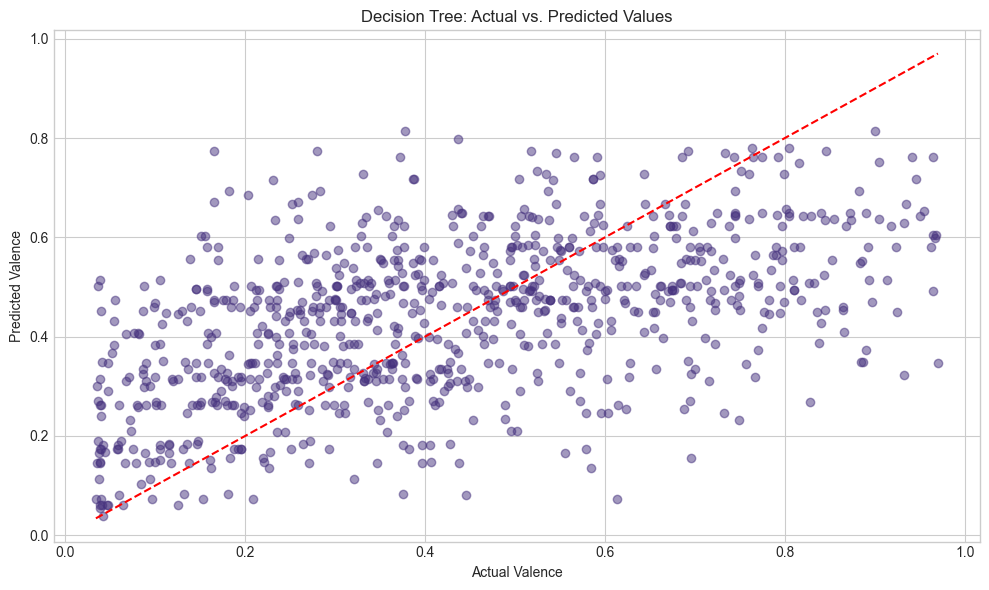

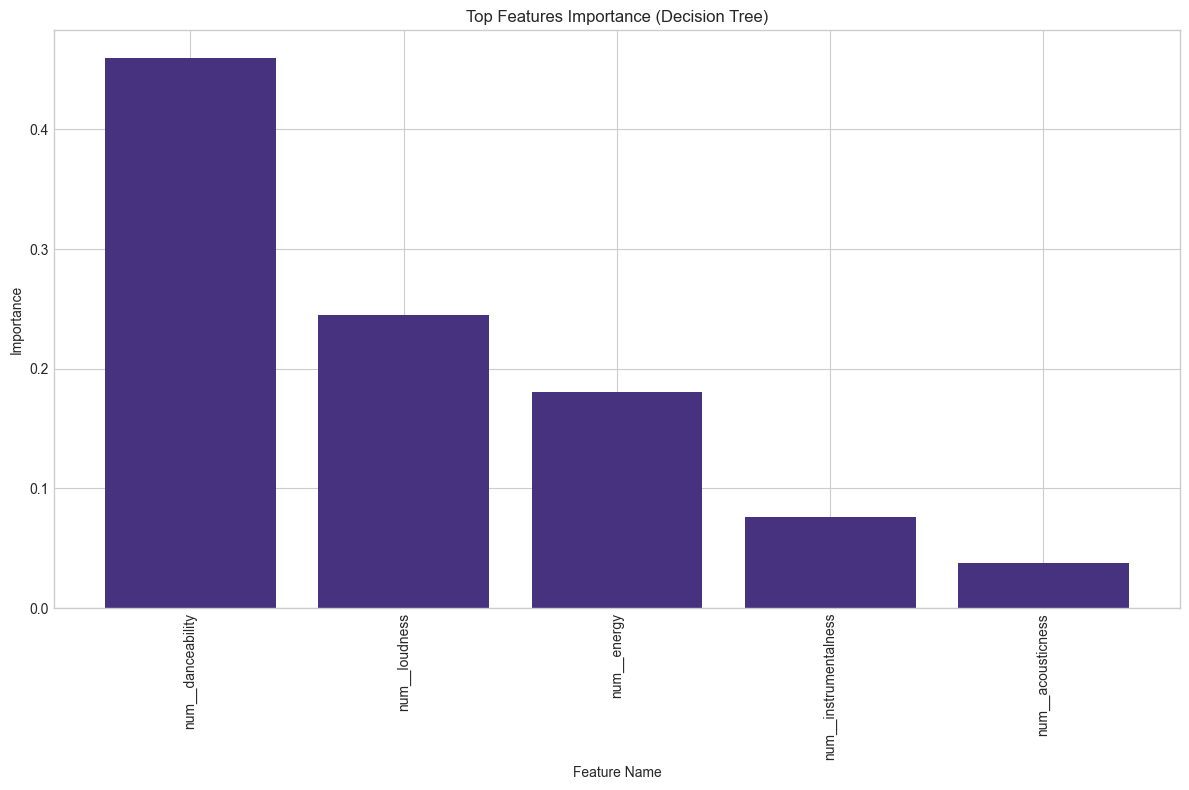


Top 10 important features:
num__danceability: 0.4597
num__loudness: 0.2452
num__energy: 0.1809
num__instrumentalness: 0.0764
num__acousticness: 0.0378
Could not plot decision tree: The 'proportion' parameter of plot_tree must be an instance of 'bool' or an instance of 'numpy.bool'. Got 1.5 instead.

Decision Tree Text Representation (Limited to Depth 3):
|--- num__danceability <= 0.68
|   |--- num__loudness <= -0.32
|   |   |--- num__instrumentalness <= 2.35
|   |   |   |--- num__danceability <= -0.42
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- num__danceability >  -0.42
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- num__instrumentalness >  2.35
|   |   |   |--- num__danceability <= -2.42
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- num__danceability >  -2.42
|   |   |   |   |--- truncated branch of depth 7
|   |--- num__loudness >  -0.32
|   |   |--- num__energy <= 0.66
|   |   |   |--- num__energy <= 0.41
|   |   |   |   |--

<Figure size 3000x1500 with 0 Axes>

In [39]:
# Create decision tree pipeline
decision_tree_pipeline = Pipeline([
    ('preprocessor', reg_preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define parameter distribution for randomized search
param_dist_dt = {
    'regressor__max_depth': [6, 8, 10, 12, 15, 18, 20, None],
    'regressor__min_samples_split': [2, 5, 10, 15, 20, 30],
    'regressor__min_samples_leaf': [1, 2, 4, 6, 8, 12],
    'regressor__max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7, None],
    'regressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'regressor__splitter': ['best', 'random'],
    'regressor__ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]
}

# Use CV for hyperparameter tuning
random_search_dt = RandomizedSearchCV(
    decision_tree_pipeline, 
    param_distributions=param_dist_dt, 
    n_iter=100,  # Number of parameter settings sampled
    cv=10,       # 10-fold cross-validation
    scoring='r2',
    verbose=1,
    n_jobs=-1,   # Use all available processors
    random_state=42
)

# Fit the model
print("Starting RandomizedSearchCV for Decision Tree Regressor...")
random_search_dt.fit(df_reg_x_train, df_reg_y_train)

# Get the best model
best_dt = random_search_dt.best_estimator_

# Print results
print(f"Best Decision Tree parameters: {random_search_dt.best_params_}")
print(f"Best cross-validation score: {random_search_dt.best_score_:.4f} (R²)")

# Make predictions on test set
y_pred_dt = best_dt.predict(df_reg_x_test)

# Calculate evaluation metrics
r2_dt = r2_score(df_reg_y_test, y_pred_dt)
mae_dt = mean_absolute_error(df_reg_y_test, y_pred_dt)
mse_dt = mean_squared_error(df_reg_y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Display results
print("\nDecision Tree evaluation results:")
print(f"R² score: {r2_dt:.4f}")
print(f"MAE: {mae_dt:.4f}")
print(f"MSE: {mse_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")

# Save model
joblib.dump(best_dt, 'best_RandomizedSearch_decision_tree_model.pkl')

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(df_reg_y_test, y_pred_dt, alpha=0.5)
plt.plot([df_reg_y_test.min(), df_reg_y_test.max()], [df_reg_y_test.min(), df_reg_y_test.max()], 'r--')
plt.xlabel('Actual Valence')
plt.ylabel('Predicted Valence')
plt.title('Decision Tree: Actual vs. Predicted Values')
plt.tight_layout()
plt.show()

# Feature importance visualization
if hasattr(best_dt.named_steps['regressor'], 'feature_importances_'):
    # Get the fitted preprocessor
    fitted_preprocessor = best_dt.named_steps['preprocessor']
    
    try:
        # Try to get feature names from the preprocessor
        feature_names = fitted_preprocessor.get_feature_names_out()
        importances = best_dt.named_steps['regressor'].feature_importances_
        indices = np.argsort(importances)[::-1]
        
        # Plot top 20 features (or all if less than 20)
        n_features_to_plot = min(20, len(indices))
        
        plt.figure(figsize=(12, 8))
        plt.title('Top Features Importance (Decision Tree)')
        plt.bar(range(n_features_to_plot), importances[indices][:n_features_to_plot], align='center')
        plt.xticks(range(n_features_to_plot), [feature_names[i] for i in indices][:n_features_to_plot], rotation=90)
        plt.xlabel('Feature Name')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()
        
        # Print top 10 feature importances
        print("\nTop 10 important features:")
        for i in range(min(10, len(indices))):
            print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
            
    except (AttributeError, NotFittedError) as e:
        print(f"Cannot get feature names from the preprocessor. Error: {e}")
        importances = best_dt.named_steps['regressor'].feature_importances_
        plt.figure(figsize=(10, 6))
        plt.title('Decision Tree Feature Importances (without labels)')
        plt.bar(range(len(importances)), importances[np.argsort(importances)[::-1]], align='center')
        plt.xlabel('Feature Index')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()

# Enhanced decision tree visualization
try:
    from sklearn.tree import plot_tree
    from sklearn.tree import export_graphviz
    import graphviz
    
    # Get the decision tree from the pipeline
    dt_regressor = best_dt.named_steps['regressor']
    
    # 1. Create larger plot with increased font size and better spacing
    plt.figure(figsize=(30, 15))
    max_depth_to_plot = min(3, dt_regressor.get_depth())
    plot_tree(dt_regressor, 
              max_depth=max_depth_to_plot, 
              filled=True, 
              rounded=True, 
              feature_names=feature_names if 'feature_names' in locals() else None,
              precision=2,
              fontsize=12,
              proportion=1.5)  # Better spacing between nodes
    plt.title(f'Decision Tree Structure (Limited to Depth {max_depth_to_plot})', fontsize=16)
    plt.tight_layout()
    # Save high-resolution version
    plt.show()
    
    # 2. Create a more focused visualization (only depth 2)
    plt.figure(figsize=(24, 12))
    focused_depth = 2  # More focused view
    plot_tree(dt_regressor, 
              max_depth=focused_depth, 
              filled=True, 
              rounded=True, 
              feature_names=feature_names if 'feature_names' in locals() else None,
              precision=2,
              fontsize=14)
    plt.title(f'Focused Decision Tree (Depth {focused_depth})', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # 3. Create interactive visualization using graphviz
    if 'feature_names' in locals():
        dot_data = export_graphviz(
            dt_regressor, 
            max_depth=3,
            feature_names=feature_names,
            filled=True, 
            rounded=True,
            special_characters=True,
            out_file=None
        )
        graph = graphviz.Source(dot_data)
        graph.render("decision_tree_interactive", format="png")
        print("Interactive visualization saved as 'decision_tree_interactive.png'")
    
    # Print tree statistics
    print(f"Full tree depth: {dt_regressor.get_depth()}")
    print(f"Number of leaves: {dt_regressor.get_n_leaves()}")
    
except Exception as e:
    print(f"Could not plot decision tree: {e}")
    
    # Alternative visualization if the main approach fails
    try:
        from sklearn.tree import export_text
        
        # Get text representation of the tree
        dt_regressor = best_dt.named_steps['regressor']
        tree_rules = export_text(dt_regressor, 
                                feature_names=feature_names if 'feature_names' in locals() else None,
                                max_depth=3)
        print("\nDecision Tree Text Representation (Limited to Depth 3):")
        print(tree_rules)
    except Exception as text_error:
        print(f"Could not create text representation of the tree: {text_error}")

**Following the data cleaning process, I implemented several machine learning regression models aimed at predicting valence to determine which model exhibited superior performance. However, it is noteworthy that none of the models yielded satisfactory results, with linear regression emerging as the most effective option. The incorporation of regularization techniques, specifically L1 and L2 penalties, did not significantly enhance the performance of the linear regression model, which was already underperforming. I hypothesize that the lack of efficacy in the models may be attributed to the inherently subjective nature of emotions such as positivity or happiness; different individuals may experience varying emotional responses to the same musical piece, thereby complicating the quantification of valence. Additionally, I contend that valence may exhibit a highly non-linear relationship with certain musical features, suggesting that more sophisticated modeling techniques may be necessary for accurate predictions.**